In [2]:
from pathlib import Path
import numpy as np
import pickle
from matplotlib import pyplot as plt
import tensorflow as tf
import scipy as sp
#Custom
import utils
import embeddings as emb
#New
from matplotlib import gridspec

In [3]:
sd = 100 #np.random.randint(0,10e5)
#=Synthetic data
n_systems = 2
n_concepts = 200
noise = 0.001 #0.001
emb_dim = 2
n_epicentres = 1
linearsep = 1

In [4]:
clumps = [(1,1),(2,2),(2,4),(2,8),(3,2),(3,4),(3,8)]
systems = []

In [5]:
for n_epicentres,linearsep in clumps:
    A,B,X_A,X_B,B_shuff,B_idx_map = emb.get_data(n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,bplot=False)
    systems.append(A)

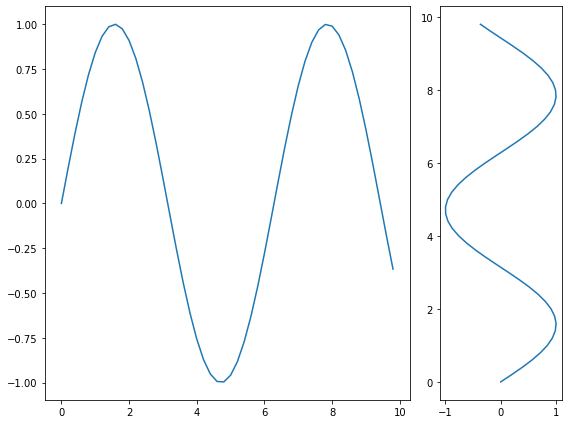

In [6]:
# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(x, y)
ax1 = plt.subplot(gs[1])
ax1.plot(y, x)

plt.tight_layout()

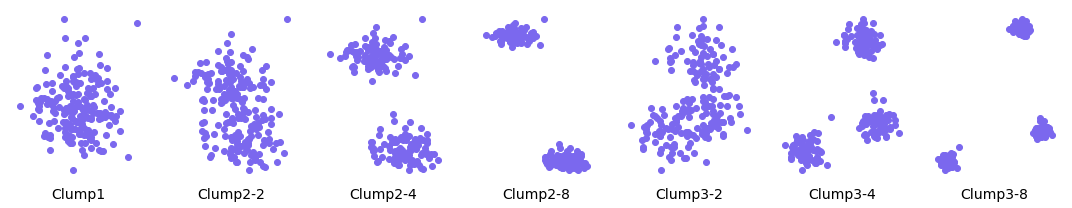

In [7]:
names = ['Clump1','Clump2-2','Clump2-4','Clump2-8','Clump3-2','Clump3-4','Clump3-8']
N = len(systems)
#==PLOT 1 SYSTEM
i = 0
fig, axes = plt.subplots(1, N,figsize = (15,3))
for i in range(N):
    #axes[i].set_title('Clump%d'%(i+1))
    axes[i].scatter(systems[i][:,0], systems[i][:,1], color = 'mediumslateblue') #'mediumvioletred'
    #axes[i].axis('off')
    s = names[i] #'Clump%d'%(i+1)
    axes[i].set_xlabel(s,fontsize = 14)
    axes[i].tick_params(axis=u'both', which=u'both',length=0)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    #axes[i].text(-0.1,-0.4,s,fontsize = 12)
plt.tight_layout()

In [ ]:
#==PLOT ALL
noisy_Xs = [X_A,X_B]
systems = [A,B]
fig, axes = plt.subplots(1, 2)
axes[0].set_title('Noise only')
axes[1].set_title('Noise + rotation')
colors = ["#f64b4bff","#4b64f6ff",'g']
labels = ["System A","System B","System C"]       
for i in range(n_systems): 
    axes[0].scatter(noisy_Xs[i][:,0], noisy_Xs[i][:,1],color = colors[i], label = labels[i])
    axes[1].scatter(systems[i][:,0], systems[i][:,1],color = colors[i], label = labels[i]) 
fig.suptitle("Synthetic data")
handles, labels = axes[1].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
plt.show()

# Noise

In [75]:
sd = 100 #np.random.randint(0,10e5)
#=Synthetic data
n_systems = 2
n_concepts = 100
noise = 0.01 #0.001
emb_dim = 5
n_epicentres = 1
linearsep = 1

In [76]:
#noise5e-4','noise1e-3 \n (base)','noise5e-3','noise1e-2','noise2e-2
noises = [5e-4,1e-3,5e-3,1e-2,2e-2]
noisy_As = []
noisy_Bs = []
ceil_accs = []
for noise in noises:
    A,B,X_A,X_B,B_shuff,B_idx_map = emb.get_data(n_systems,n_concepts,emb_dim,noise,n_epicentres,linearsep,sd,bplot=False)
    acc_1, acc_5, acc_10, acc_half = utils.mapping_accuracy(X_A, X_B)
    noisy_As.append(X_A)
    noisy_Bs.append(X_B)
    ceil_accs.append(acc_1)

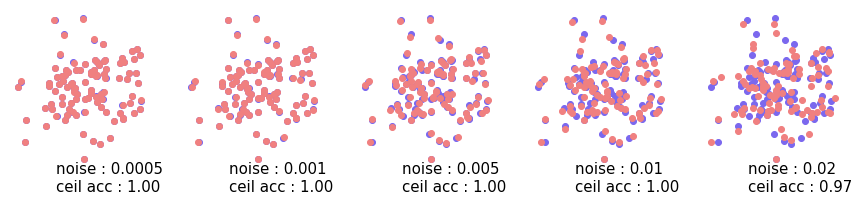

In [77]:
#==PLOT ALL
n_exp = len(noises)
fig, axes = plt.subplots(1, n_exp,figsize = (15,3))      
for i in range(n_exp): 
    axes[i].scatter(noisy_As[i][:,0], noisy_As[i][:,1],color = 'mediumslateblue')
    axes[i].scatter(noisy_Bs[i][:,0], noisy_Bs[i][:,1],color = 'lightcoral') 
    axes[i].axis('off')
    s = 'noise : %s \nceil acc : %.2f'%(noises[i],ceil_accs[i])
    #axes[i].set_xlabel(s,fontsize = 12)
    axes[i].text(-0.15,-0.35,s,va= 'top',fontsize = 15)
handles, labels = axes[1].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
plt.show()